In [1]:
#/Users/vallirajasekar/Documents/LI_BFSI_01+-+Life+Insurance+Sales/Sales.xlsx

In [2]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/vallirajasekar/Desktop/Life Insurance Project/Notebooks


In [4]:
#df=pd.read_csv('/Users/vallirajasekar/Desktop/Life Insurance Project/Notebooks/Life_Insurance.csv')

In [5]:
df=pd.read_csv('/Users/vallirajasekar/Desktop/Life Insurance Project/Notebooks/Book2.csv')

In [6]:
#df=pd.read_excel('Sales.xlsx',sheet_name='Sales')

In [7]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [45]:
df.select_dtypes(include=['float64', 'int64']).columns


Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'ExistingProdType',
       'NumberOfPolicy', 'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure',
       'SumAssured', 'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [46]:
df.select_dtypes(include=['object']).columns


Index(['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation',
       'MaritalStatus', 'Zone', 'PaymentMethod'],
      dtype='object')

In [8]:
df_1=df.copy()

In [9]:
df.shape

(4520, 20)

In [10]:
df.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [12]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [13]:
df.describe()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
count,4.520000e+03,4520.000000,4251.000000,4294.000000,4520.000000,4475.000000,4284.000000,4520.000000,4336.000000,4.366000e+03,4520.000000,4468.000000
mean,7.002260e+06,4077.838274,14.494707,14.469027,3.688938,3.565363,22890.309991,0.287168,4.130074,6.199997e+05,4.626991,3.067592
std,1.304956e+03,1403.321711,9.037629,8.963671,1.015769,1.455926,4885.600757,0.452491,3.346386,2.462348e+05,3.620132,1.382968
min,7.000000e+06,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,0.000000,1.000000
25%,7.001130e+06,3027.750000,7.000000,7.000000,3.000000,2.000000,19683.500000,0.000000,2.000000,4.394432e+05,2.000000,2.000000
50%,7.002260e+06,3911.500000,13.000000,13.000000,4.000000,4.000000,21606.000000,0.000000,3.000000,5.789765e+05,3.000000,3.000000
75%,7.003389e+06,4867.250000,20.000000,20.000000,4.000000,5.000000,24725.000000,1.000000,6.000000,7.582360e+05,8.000000,4.000000
max,7.004519e+06,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,18.000000,5.000000


In [14]:
df.Age.describe()

count    4251.000000
mean       14.494707
std         9.037629
min         2.000000
25%         7.000000
50%        13.000000
75%        20.000000
max        58.000000
Name: Age, dtype: float64

In [15]:
df.isnull().sum()>0

CustID                  False
AgentBonus              False
Age                      True
CustTenure               True
Channel                 False
Occupation              False
EducationField          False
Gender                  False
ExistingProdType        False
Designation             False
NumberOfPolicy           True
MaritalStatus           False
MonthlyIncome            True
Complaint               False
ExistingPolicyTenure     True
SumAssured               True
Zone                    False
PaymentMethod           False
LastMonthCalls          False
CustCareScore            True
dtype: bool

In [16]:
df.loc[:, df.isnull().sum() > 0]


,Age,CustTenure,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,SumAssured,CustCareScore
0,22.0,4.0,2.0,20993.0,2.0,806761.0,2.0
1,11.0,2.0,4.0,20130.0,3.0,294502.0,3.0
2,26.0,4.0,3.0,17090.0,2.0,NaN,3.0
3,11.0,NaN,3.0,17909.0,2.0,268635.0,5.0
4,6.0,NaN,4.0,18468.0,4.0,366405.0,5.0
...,...,...,...,...,...,...,...
4515,4.0,8.0,2.0,26355.0,2.0,636473.0,1.0
4516,9.0,9.0,2.0,20991.0,3.0,296813.0,3.0
4517,23.0,23.0,5.0,NaN,2.0,667371.0,1.0
4518,10.0,10.0,2.0,20068.0,6.0,943999.0,5.0


In [17]:
df.Age.describe()

count    4251.000000
mean       14.494707
std         9.037629
min         2.000000
25%         7.000000
50%        13.000000
75%        20.000000
max        58.000000
Name: Age, dtype: float64

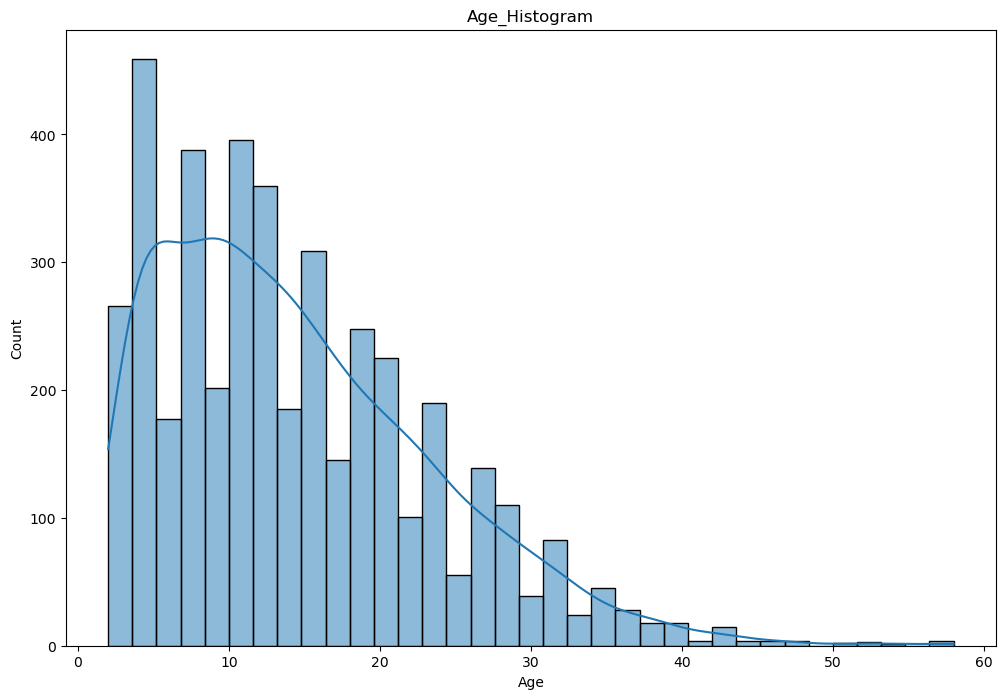

In [18]:
# The Age column is left Skewed and missing value is less than 30%

fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

sns.histplot(df, x="Age", kde=True, ax=ax)
ax.set_xlabel("Age")
ax.set_title("Age_Histogram")

plt.show()


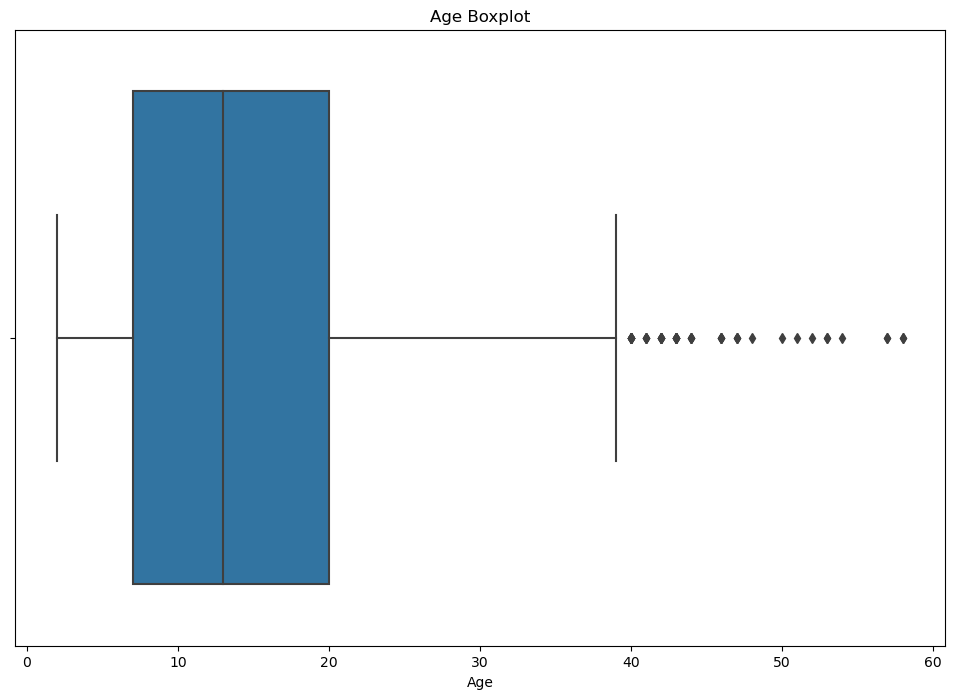

In [19]:

fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df, x='Age', ax=ax)

ax.set_xlabel("Age")
ax.set_title("Age Boxplot")

plt.show()


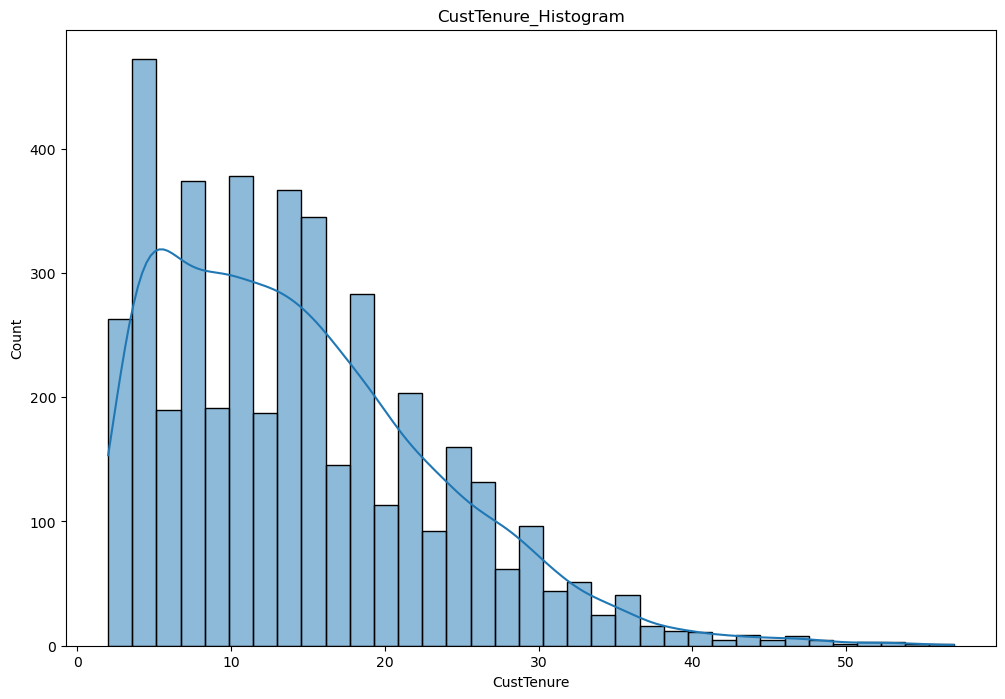

In [20]:
fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

sns.histplot(df, x="CustTenure", kde=True, ax=ax)
ax.set_xlabel("CustTenure")
ax.set_title("CustTenure_Histogram")

plt.show()


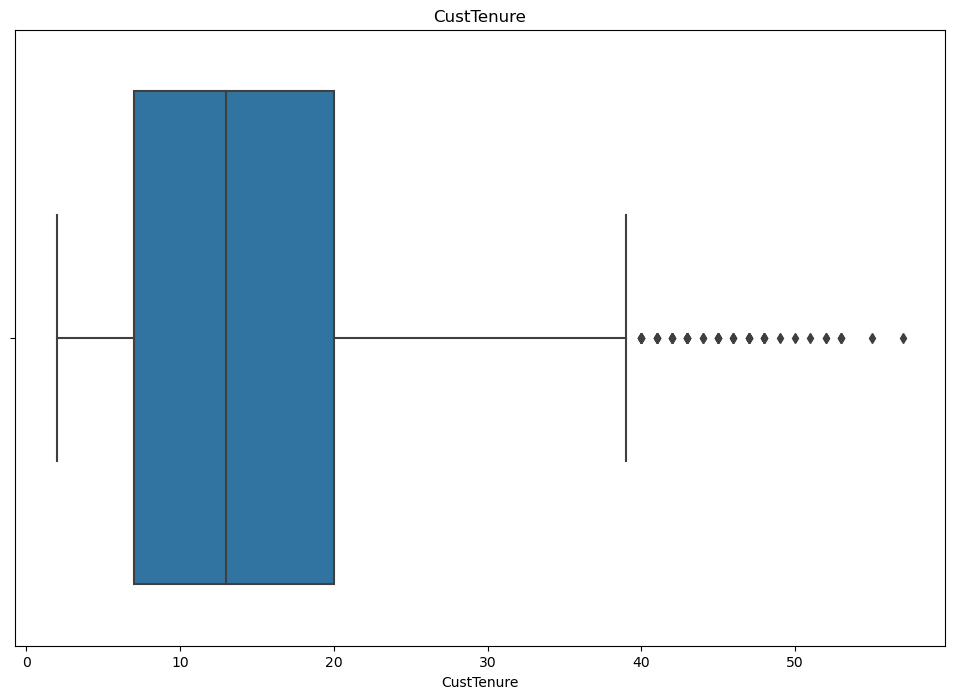

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df, x='CustTenure', ax=ax)

ax.set_xlabel("CustTenure")
ax.set_title("CustTenure")

plt.show()


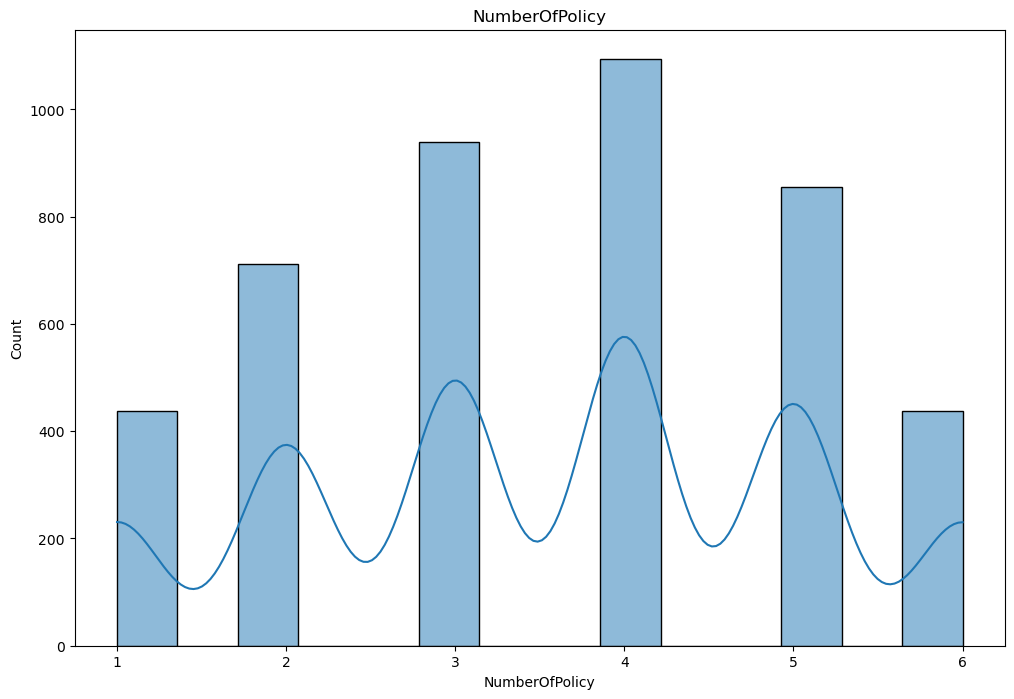

In [22]:
fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

sns.histplot(df, x="NumberOfPolicy", kde=True, ax=ax)
ax.set_xlabel("NumberOfPolicy")
ax.set_title("NumberOfPolicy")

plt.show()


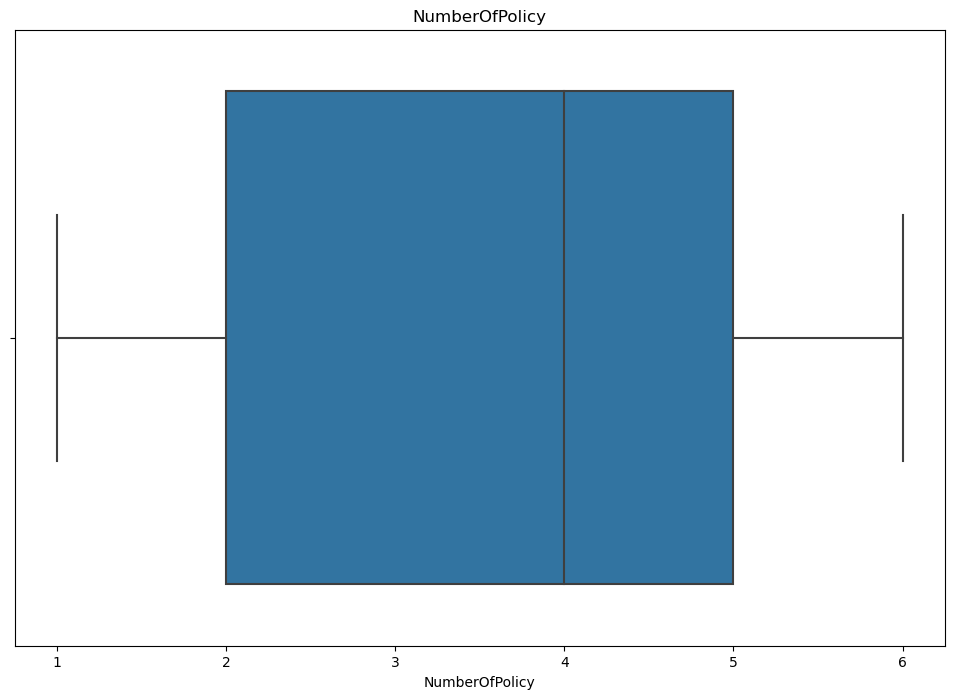

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df, x='NumberOfPolicy', ax=ax)

ax.set_xlabel("NumberOfPolicy")
ax.set_title("NumberOfPolicy")

plt.show()


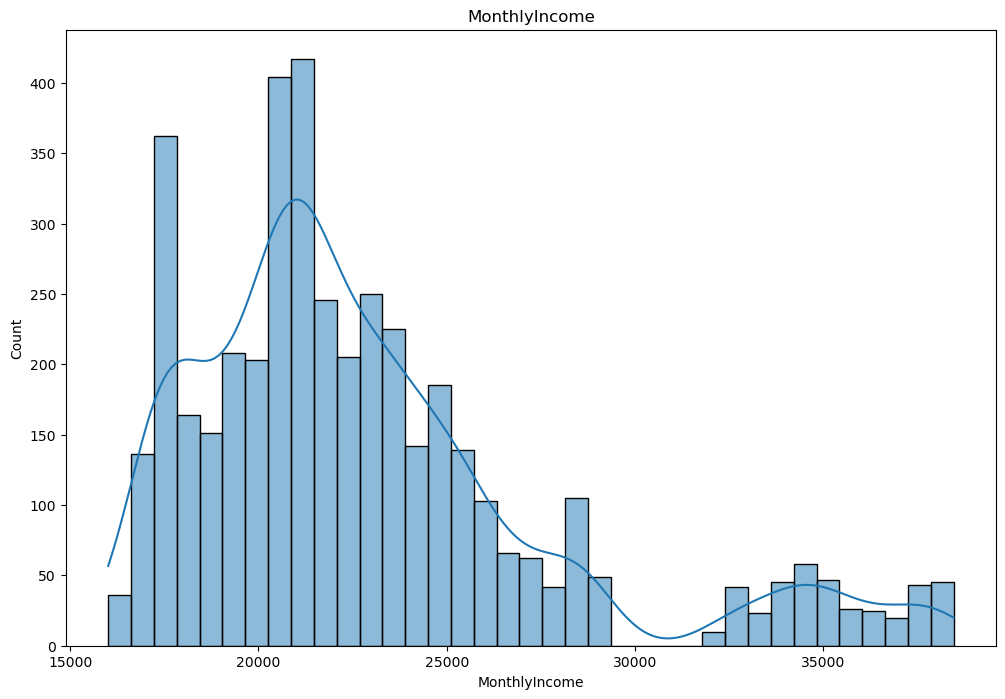

In [24]:

fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

sns.histplot(df, x="MonthlyIncome", kde=True, ax=ax)
ax.set_xlabel("MonthlyIncome")
ax.set_title("MonthlyIncome")

plt.show()



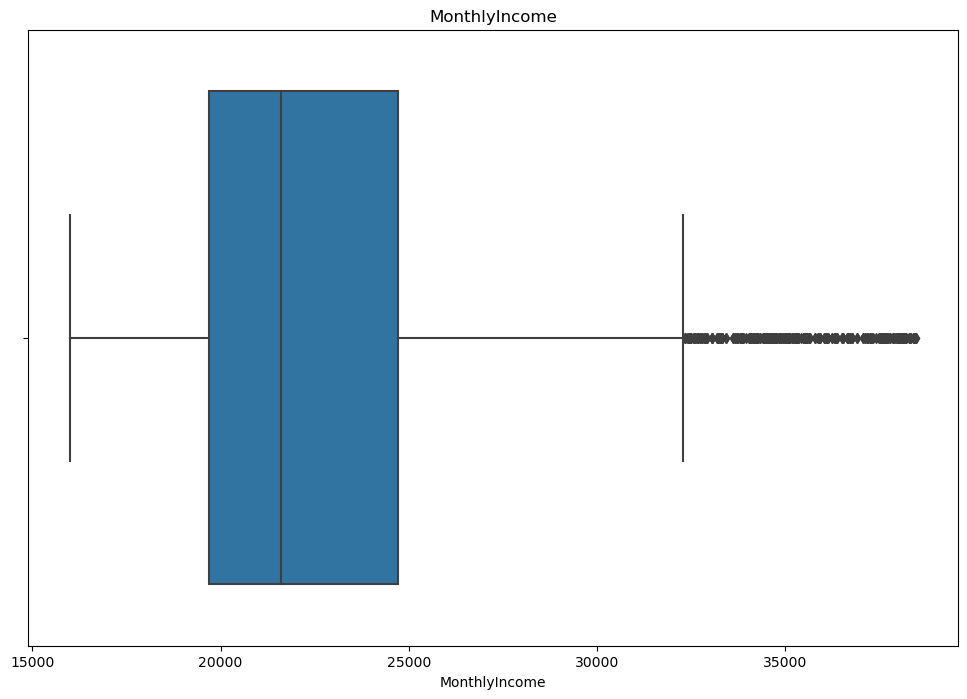

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df, x='MonthlyIncome', ax=ax)

ax.set_xlabel("MonthlyIncome")
ax.set_title("MonthlyIncome")

plt.show()



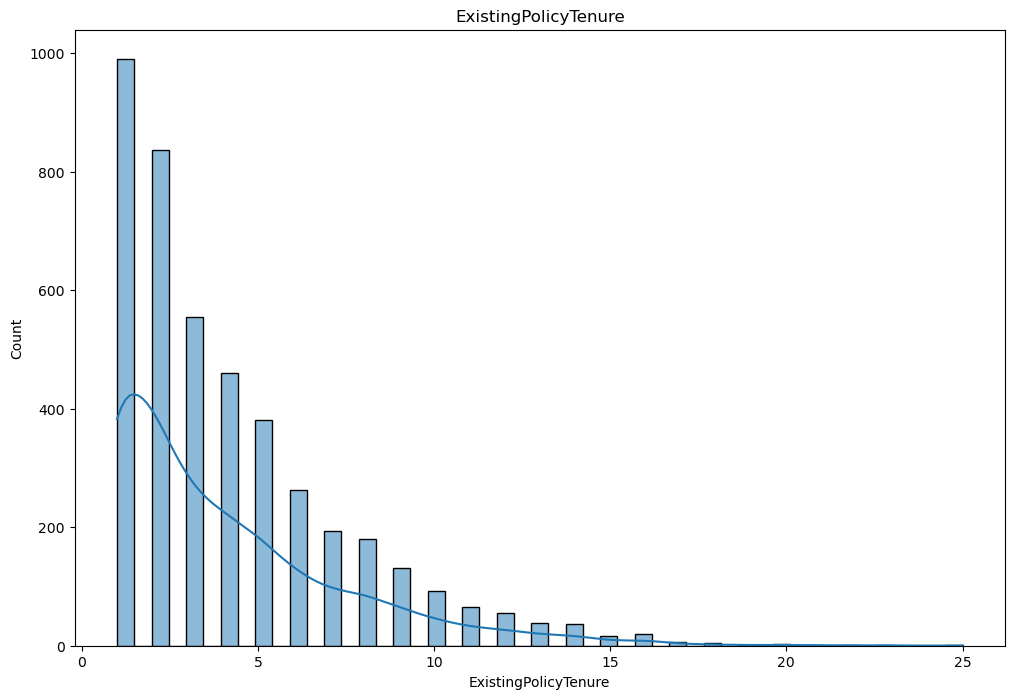

In [26]:

fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

sns.histplot(df, x="ExistingPolicyTenure", kde=True, ax=ax)
ax.set_xlabel("ExistingPolicyTenure")
ax.set_title("ExistingPolicyTenure")

plt.show()


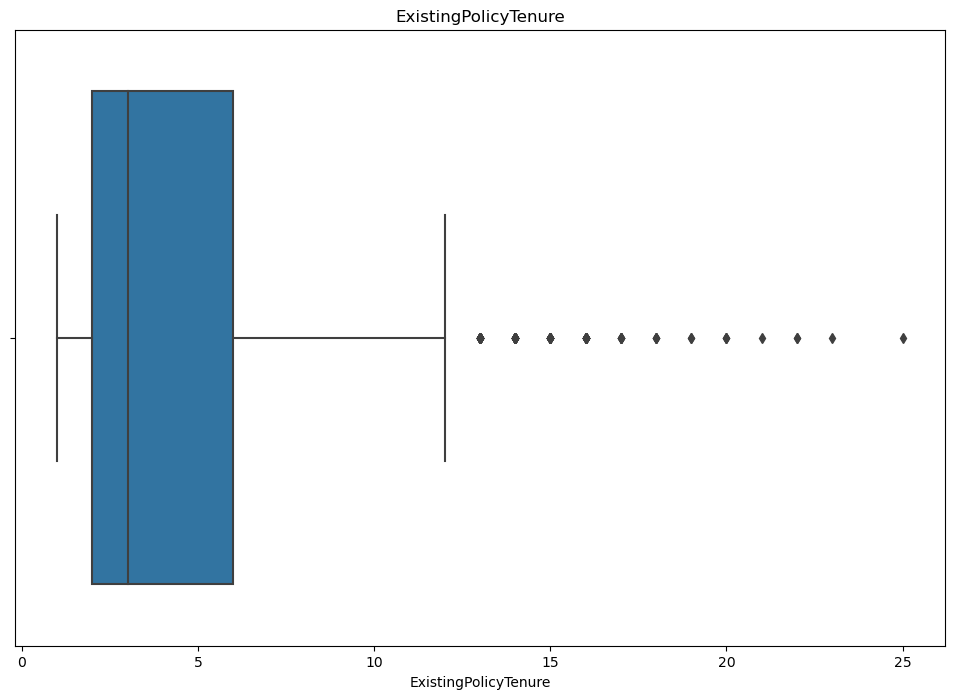

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df, x='ExistingPolicyTenure', ax=ax)

ax.set_xlabel("ExistingPolicyTenure")
ax.set_title("ExistingPolicyTenure")

plt.show()


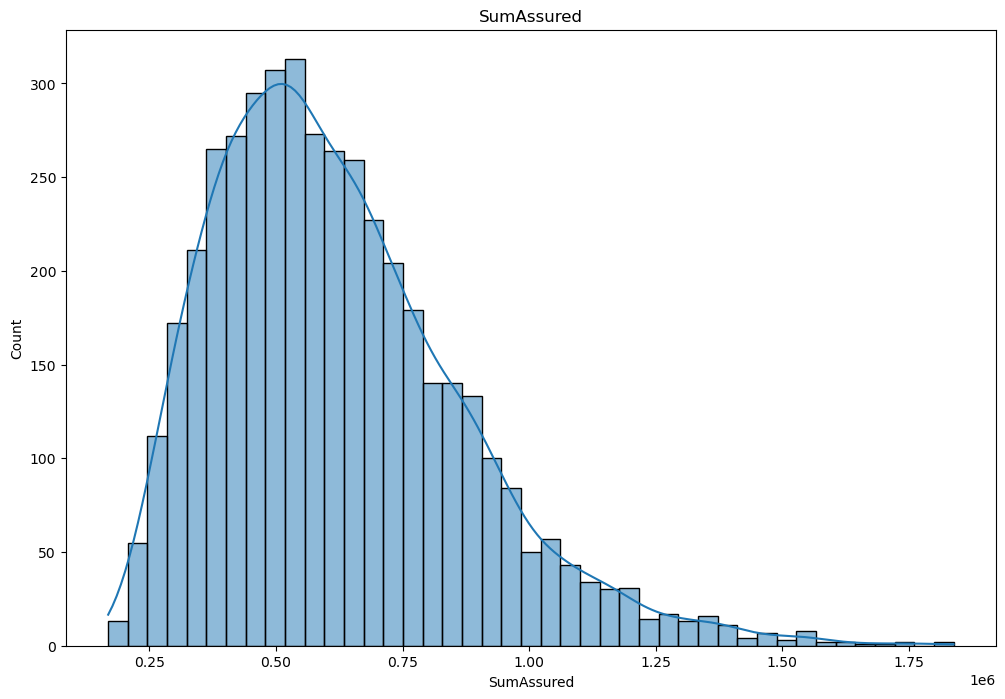

In [28]:


fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

sns.histplot(df, x="SumAssured", kde=True, ax=ax)
ax.set_xlabel("SumAssured")
ax.set_title("SumAssured")

plt.show()




In [29]:
df.SumAssured.describe()

count    4.366000e+03
mean     6.199997e+05
std      2.462348e+05
min      1.685360e+05
25%      4.394432e+05
50%      5.789765e+05
75%      7.582360e+05
max      1.838496e+06
Name: SumAssured, dtype: float64

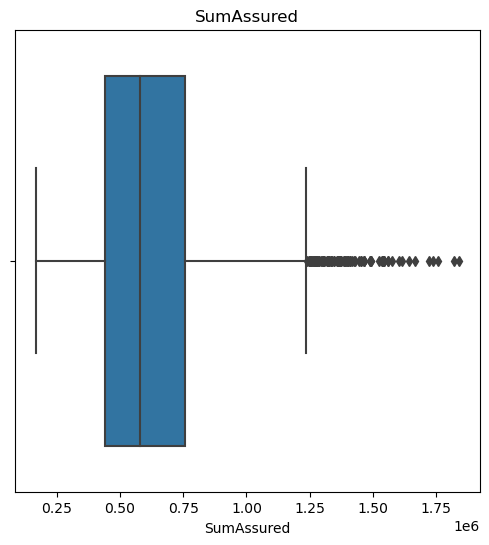

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.boxplot(data=df, x='SumAssured', ax=ax)

ax.set_xlabel("SumAssured")
ax.set_title("SumAssured")

plt.show()


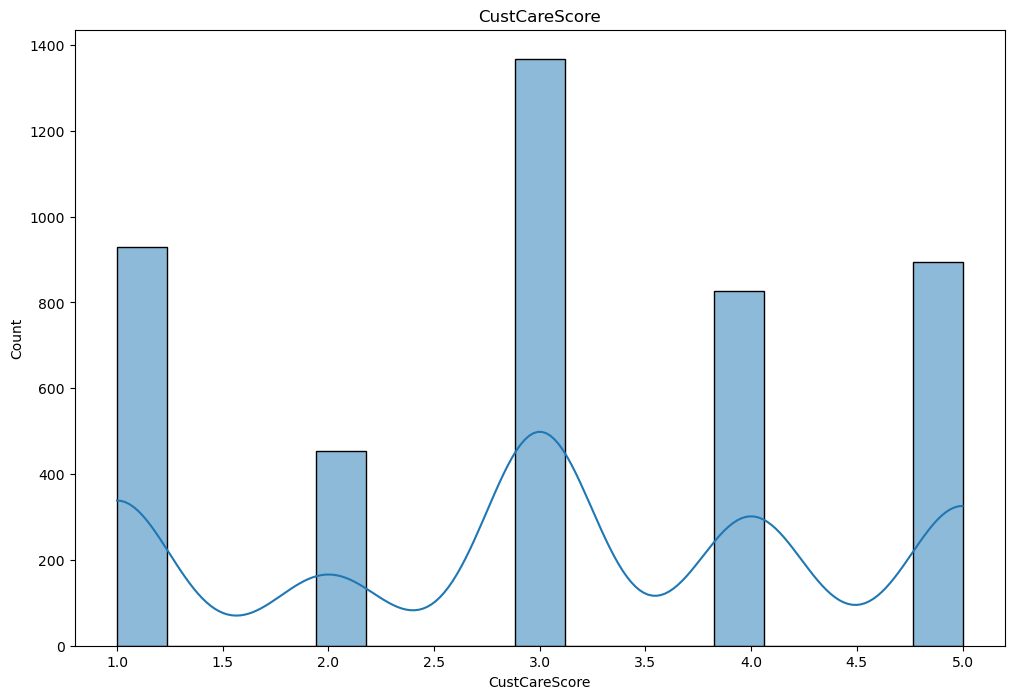

In [31]:

fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

sns.histplot(df, x="CustCareScore", kde=True, ax=ax)
ax.set_xlabel("CustCareScore")
ax.set_title("CustCareScore")

plt.show()



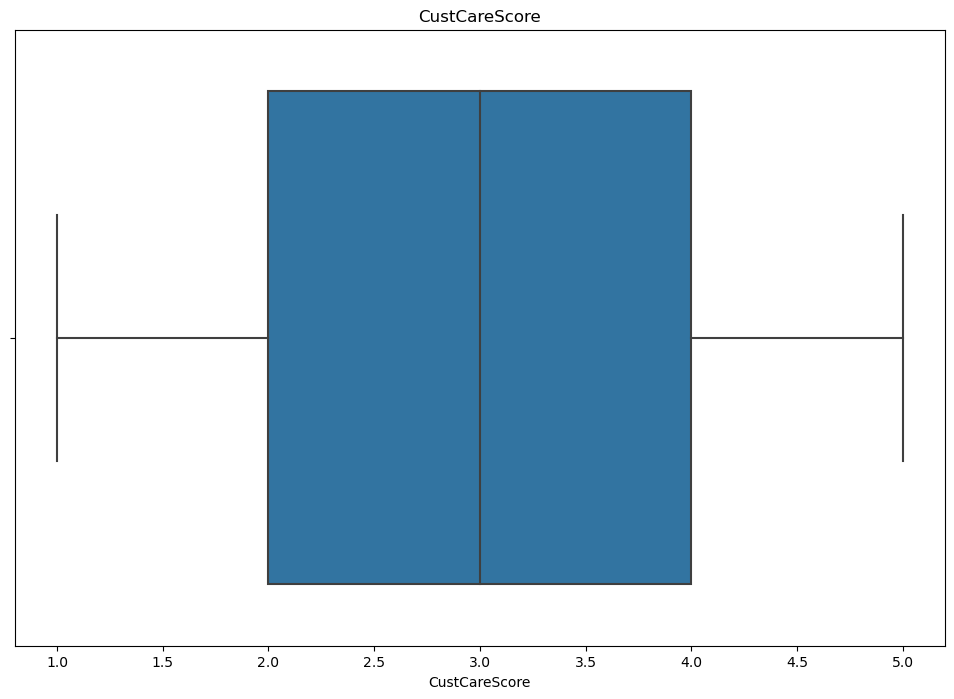

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df, x='CustCareScore', ax=ax)

ax.set_xlabel("CustCareScore")
ax.set_title("CustCareScore")

plt.show()


# IMPUTING MISSING VALUE

In [33]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [34]:
df.describe()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
count,4.520000e+03,4520.000000,4251.000000,4294.000000,4520.000000,4475.000000,4284.000000,4520.000000,4336.000000,4.366000e+03,4520.000000,4468.000000
mean,7.002260e+06,4077.838274,14.494707,14.469027,3.688938,3.565363,22890.309991,0.287168,4.130074,6.199997e+05,4.626991,3.067592
std,1.304956e+03,1403.321711,9.037629,8.963671,1.015769,1.455926,4885.600757,0.452491,3.346386,2.462348e+05,3.620132,1.382968
min,7.000000e+06,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,0.000000,1.000000
25%,7.001130e+06,3027.750000,7.000000,7.000000,3.000000,2.000000,19683.500000,0.000000,2.000000,4.394432e+05,2.000000,2.000000
50%,7.002260e+06,3911.500000,13.000000,13.000000,4.000000,4.000000,21606.000000,0.000000,3.000000,5.789765e+05,3.000000,3.000000
75%,7.003389e+06,4867.250000,20.000000,20.000000,4.000000,5.000000,24725.000000,1.000000,6.000000,7.582360e+05,8.000000,4.000000
max,7.004519e+06,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,18.000000,5.000000


In [35]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
#MonthlyIncome,ExistingPolicyTenure,SumAssured,CustCareScore
# Impute missing values in the Age column of df
df['Age'] = imputer.fit_transform(df[['Age']])
df['CustTenure']=imputer.fit_transform(df[['CustTenure']])
df['NumberOfPolicy']=imputer.fit_transform(df[['NumberOfPolicy']])
df['MonthlyIncome']=imputer.fit_transform(df[['MonthlyIncome']])
df['ExistingPolicyTenure']=imputer.fit_transform(df[['ExistingPolicyTenure']])
df['SumAssured']=imputer.fit_transform(df[['SumAssured']])
df['CustCareScore']=imputer.fit_transform(df[['CustCareScore']])




In [36]:
df.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [37]:
df.describe()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
count,4.520000e+03,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4.520000e+03,4520.000000,4520.000000
mean,7.002260e+06,4077.838274,14.494707,14.469027,3.688938,3.565363,22890.309991,0.287168,4.130074,6.199997e+05,4.626991,3.067592
std,1.304956e+03,1403.321711,8.764513,8.736655,1.015769,1.448659,4756.317536,0.452491,3.277551,2.420028e+05,3.620132,1.374988
min,7.000000e+06,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,0.000000,1.000000
25%,7.001130e+06,3027.750000,8.000000,8.000000,3.000000,2.000000,19858.000000,0.000000,2.000000,4.444762e+05,2.000000,2.000000
50%,7.002260e+06,3911.500000,14.000000,14.000000,4.000000,4.000000,21877.000000,0.000000,3.000000,5.900125e+05,3.000000,3.000000
75%,7.003389e+06,4867.250000,19.000000,19.000000,4.000000,5.000000,24531.750000,1.000000,5.000000,7.500105e+05,8.000000,4.000000
max,7.004519e+06,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,18.000000,5.000000


In [38]:
df.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

for col in df.columns:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

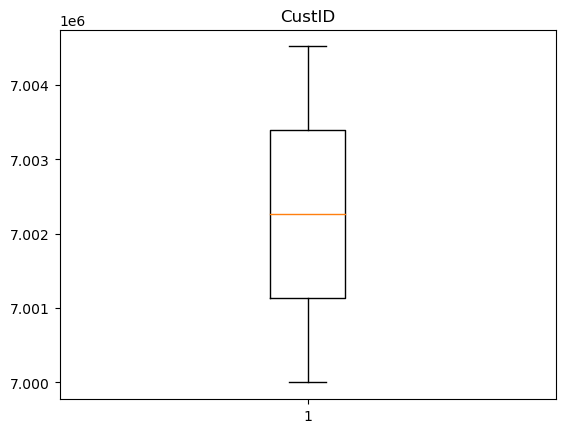

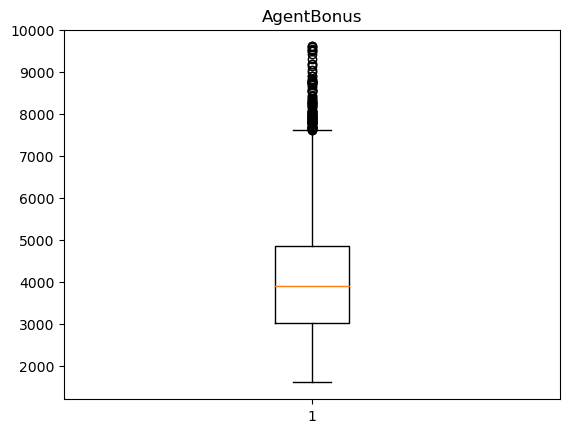

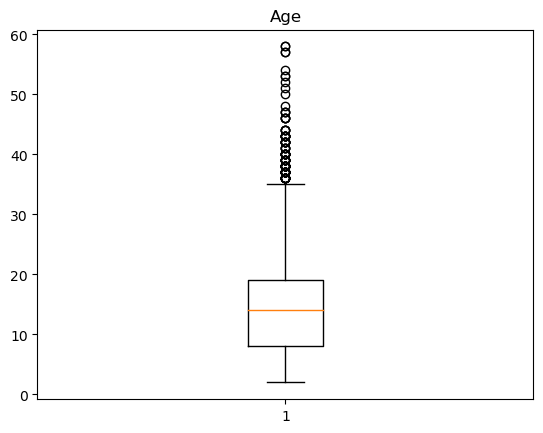

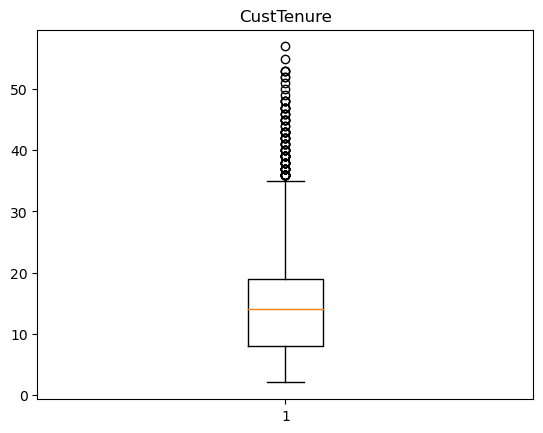

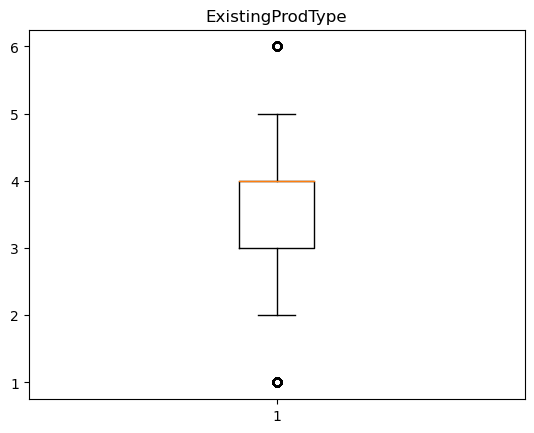

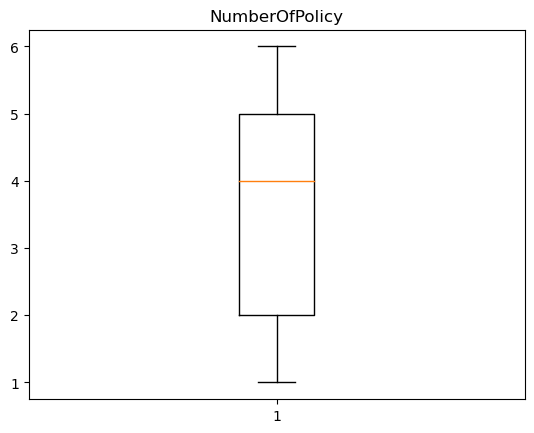

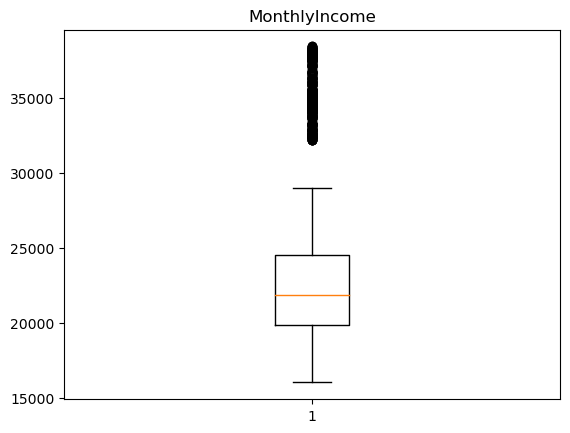

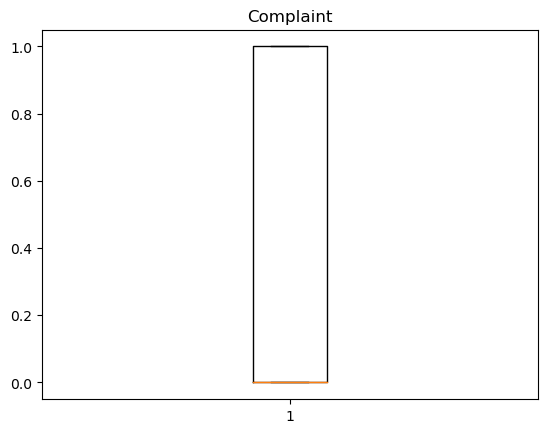

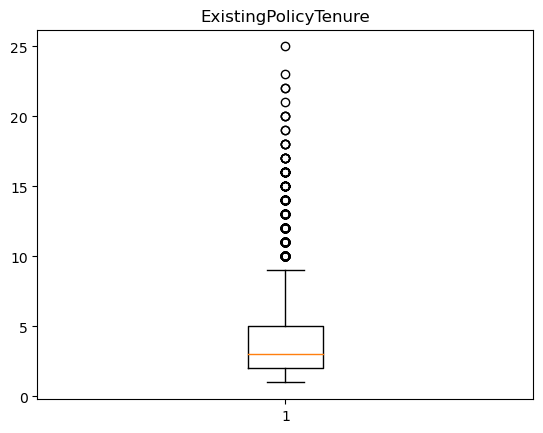

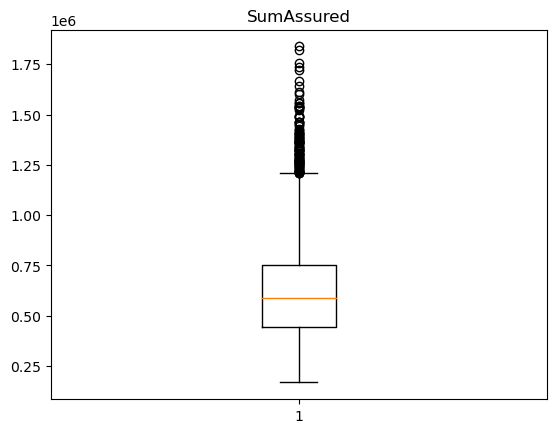

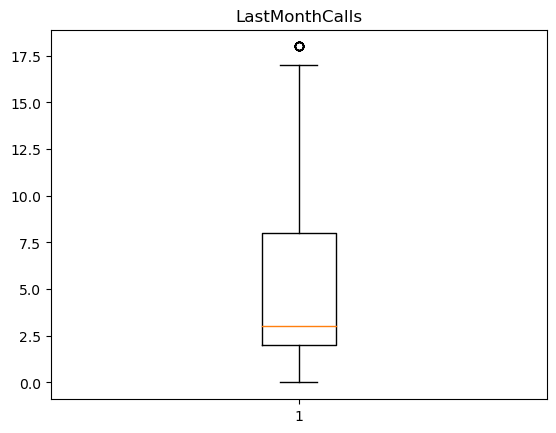

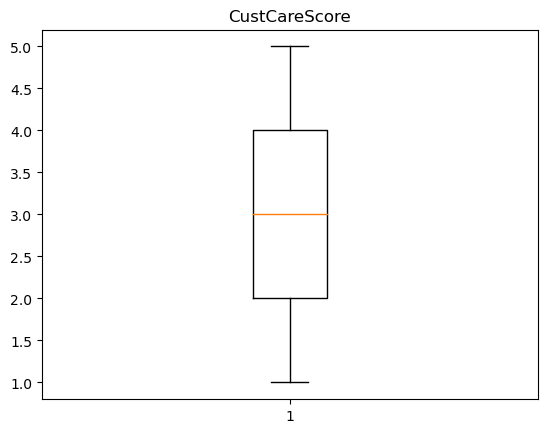

In [39]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']: # check if data is numeric
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()


# Converting object into Numerical 

In [40]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.000000,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.000000,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.000000,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.000000,North,Yearly,7,3.0
2,7000002,4273,26.0,4.000000,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,619999.699267,North,Yearly,0,3.0
3,7000003,1791,11.0,14.469027,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.000000,West,Half Yearly,0,5.0
4,7000004,2955,6.0,14.469027,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.000000,West,Half Yearly,2,5.0


In [41]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.000000,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.000000,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.000000,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.000000,North,Yearly,7,3.0
2,7000002,4273,26.0,4.000000,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,619999.699267,North,Yearly,0,3.0
3,7000003,1791,11.0,14.469027,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.000000,West,Half Yearly,0,5.0
4,7000004,2955,6.0,14.469027,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.000000,West,Half Yearly,2,5.0
